# Lab | Customer Analysis Round 7
   
### For this lab, we still keep using the marketing_customer_analysis.csv file that you can    find in the files_for_lab folder.

### Remember the previous rounds. Follow the steps as shown in previous lectures and try to improve the accuracy of the model. Include both categorical columns in the exercise. Some approaches you can try in this exercise:

### Use the concept of multicollinearity and remove insignificant variables
### Use a different method of scaling the numerical variables
### Use a different ratio of train test split
### Use the transformation on numerical columns which align it more towards a normal distribution

## Get the data

### We are using the marketing_customer_analysis.csv file.

## Dealing with the data

### Already done in rounds 2 to 7.

### Bonus: Build a function, from round 2 and round 7, to clean and process the data.

## Explore the data
### Done in the round 3.

## Modeling

### Description:

### Try to improve the linear regression model.

In [32]:
import pandas as pd
import warnings
warnings.simplefilter('ignore')

df=pd.read_csv('marketing_customer_analysis.csv')
df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [33]:
df.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [34]:
df.columns=[c.lower().replace(' ', '_') for c in df.columns]
df=df.drop(columns=['unnamed:_0', 'vehicle_type','customer','vehicle_size'],axis=1)
df=df.dropna()
df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class
0,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,...,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car
1,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,...,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car
2,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,...,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV
3,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,...,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car
6,California,5035.035257,No,Basic,Doctor,2/14/11,Employed,F,37405,Urban,...,8.0,99,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,Arizona,2771.663013,No,Basic,College,1/7/11,Employed,M,59855,Suburban,...,30.0,82,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car
10904,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,0,Suburban,...,14.0,32,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV
10906,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,...,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car
10907,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,...,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV


In [35]:
df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce')
df['month']=df['effective_to_date'].dt.strftime('%m')
df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,month
0,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,02
1,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,01
2,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,02
3,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,01
6,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,Urban,...,99,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,Suburban,...,82,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,01
10904,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,Suburban,...,32,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,02
10906,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,Urban,...,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,01
10907,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,Rural,...,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,02


In [36]:
data_num= df.select_dtypes(exclude=["object"])
data_num.isnull().sum()

customer_lifetime_value          0
effective_to_date                0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

In [37]:
data_cat= df.select_dtypes(include=["object"])
data_cat.isnull().sum()

state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
month               0
dtype: int64

In [39]:
X=data_num.drop(columns=['effective_to_date', 'total_claim_amount'], axis=1)
y=data_num.total_claim_amount

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,2.805772,customer_lifetime_value
1,2.278732,income
2,6.363674,monthly_premium_auto
3,2.782622,months_since_last_claim
4,3.265764,months_since_policy_inception
5,1.166609,number_of_open_complaints
6,2.297052,number_of_policies


In [10]:
# normalize (standard)
from sklearn.preprocessing import StandardScaler

transformer=StandardScaler().fit(X)
X_standardized=transformer.transform(X)

X_standardized_df=pd.DataFrame(X_standardized)
X_standardized_df

,0,1,2,3,4,5,6
0,-0.465131,0.341416,-0.936442,-0.803856,0.141031,-0.422250,2.524561
1,-0.840745,-1.239617,-0.849248,-1.200968,-0.790719,-0.422250,-0.822648
2,1.010536,-0.510839,0.197079,1.876656,-0.611536,-0.422250,-0.404247
3,2.085337,0.375947,0.109885,-0.506021,-1.614960,-0.422250,-0.404247
4,-0.432263,-0.008308,-0.878312,-0.704577,1.825350,2.873245,0.432555
...,...,...,...,...,...,...,...
9129,-0.761692,0.730708,-0.558602,1.479543,1.216128,3.971744,-0.822648
9130,1.633560,-1.239617,2.725701,-0.108908,-0.575700,-0.422250,-0.404247
9131,-0.399601,0.773205,-0.820183,-0.803856,0.714416,-0.422250,1.269358
9132,2.312518,0.071749,3.132606,-0.406743,0.535234,-0.422250,-0.404247


In [11]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test=tts(X, y, test_size=.3)

In [13]:
len(X_train)

6393

In [14]:
len(X_test)

2741

In [15]:
len(X)

9134

In [63]:
transformer=StandardScaler().fit(X)
X_standardized=transformer.transform(X)

X_standardized_df=pd.DataFrame(X, columns=['income','customer_lifetime_value','months_since_last_claim'])
X_standardized_df

,income,customer_lifetime_value,months_since_last_claim
0,48029,4809.216960,NaN
1,0,2228.525238,NaN
2,22139,14947.917300,NaN
3,49078,22332.439460,NaN
6,37405,5035.035257,NaN
...,...,...,...
10903,59855,2771.663013,NaN
10904,0,19228.463620,NaN
10906,61146,5259.444853,NaN
10907,39837,23893.304100,NaN


In [40]:
data_cat=pd.get_dummies(data_cat, drop_first=True)

# concat numerical and categorical transformations
X=pd.concat([X_standardized_df, data_cat], axis=1)

<AxesSubplot:ylabel='Density'>

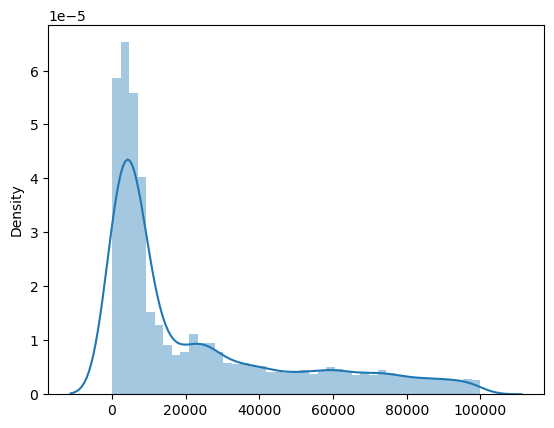

In [42]:
import seaborn as sns
sns.distplot(X_standardized_df)

In [43]:
def process_clean_data(df):
    # clean
    df.columns=[e.lower().replace(' ', '_') for e in df.columns]
    #df=df.drop(columns=['unnamed:_0', 'vehicle_type'])
    df=df.dropna()
    df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce')

    # select data
    X=df.drop(columns=['customer', 'effective_to_date', 'total_claim_amount'], axis=1)
    y=df.total_claim_amount


In [54]:
from sklearn.linear_model import LinearRegression as linreg

In [55]:
model=linreg()
model.fit(X_train, y_train)

LinearRegression()

In [59]:
from sklearn.metrics import mean_squared_error, r2_score
train_predictions=lm.predict(X_train)
r2_score(y_train,train_predictions)

0.5259401055610551

In [60]:
test_predictions=lm.predict(X_test)
r2_score(y_test,test_predictions)

0.5007183552868346

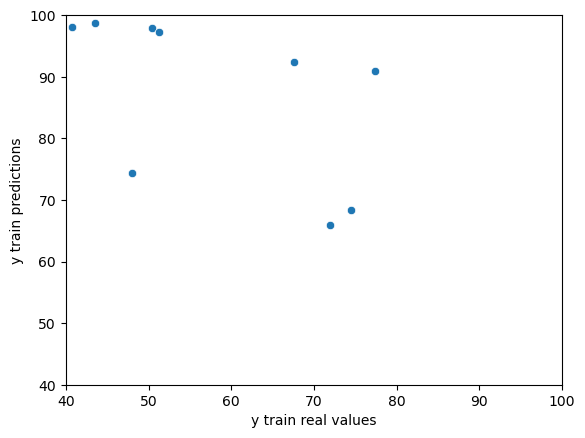

In [65]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.scatterplot(x=y_train, y=train_predictions)
ax.set_xlabel('y train real values')
ax.set_ylabel('y train predictions')
ax.set_xlim(40, 100)
ax.set_ylim(40, 100)
plt.show()

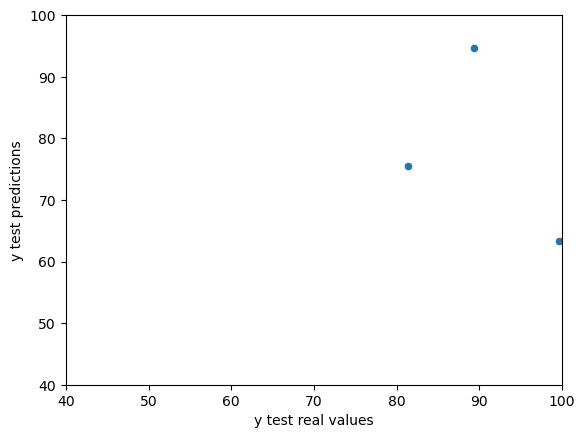

In [66]:
fig, ax = plt.subplots()
sns.scatterplot(x=y_test, y=test_predictions)
ax.set_xlabel('y test real values')
ax.set_ylabel('y test predictions')
ax.set_xlim(40, 100)
ax.set_ylim(40, 100)
plt.show()

In [68]:
import statsmodels.api as sm
model_nc=sm.OLS(y_train,X_train).fit() #model with no constant/no intercept
model_nc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     total_claim_amount   R-squared (uncentered):                   0.852
Model:                            OLS   Adj. R-squared (uncentered):              0.851
Method:                 Least Squares   F-statistic:                              5233.
Date:                Tue, 31 Jan 2023   Prob (F-statistic):                        0.00
Time:                        01:08:34   Log-Likelihood:                         -42997.
No. Observations:                6393   AIC:                                  8.601e+04
Df Residuals:                    6386   BIC:                                  8.606e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
customer_lifetime_value          -0.0004      0.000     -1.064      0.287      -0.001       0.000
income                           -0.0031   7.87e-05    -39.562      0.000      -0.003      -0.003
monthly_premium_auto              5.6690      0.064     88.913      0.000       5.544       5.794
months_since_last_claim           0.4392      0.231      1.899      0.058      -0.014       0.893
months_since_policy_inception     0.1733      0.082      2.115      0.034       0.013       0.334
number_of_open_complaints        -2.1242      2.748     -0.773      0.440      -7.512       3.264
number_of_policies                2.5094      1.001      2.507      0.012       0.547       4.472
==============================================================================
Omnibus:                      605.744   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4196.653
Skew:                           0.139   Prob(JB):                         0.00
Kurtosis:                       6.959   Cond. No.                     5.30e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

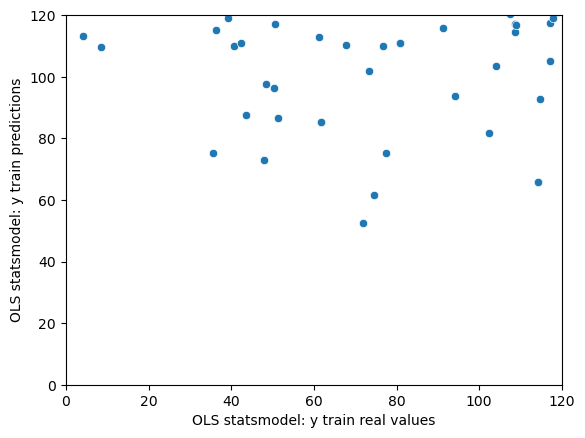

In [69]:
y_train_pred_nc=model_nc.predict(X_train)
fig, ax = plt.subplots()
sns.scatterplot(x=y_train, y=y_train_pred_nc)
ax.set_xlabel('OLS statsmodel: y train real values')
ax.set_ylabel('OLS statsmodel: y train predictions')
ax.set_xlim(0, 120)
ax.set_ylim(0, 120)
plt.show()

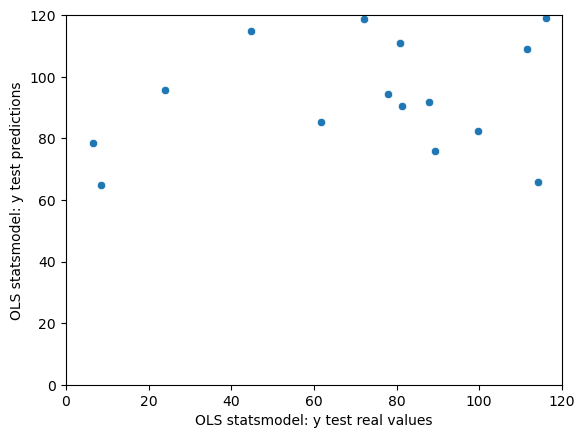

In [70]:
y_test_pred=model_nc.predict(X_test)
fig, ax = plt.subplots()
sns.scatterplot(x=y_test, y=y_test_pred)
ax.set_xlabel('OLS statsmodel: y test real values')
ax.set_ylabel('OLS statsmodel: y test predictions')
ax.set_xlim(0, 120)
ax.set_ylim(0, 120)
plt.show()

In [71]:
X_train_const=sm.add_constant(X_train) #Statsmodel with intercept/with constant
model=sm.OLS(y_train,X_train_const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_claim_amount   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     1012.
Date:                Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                        01:11:35   Log-Likelihood:                -42969.
No. Observations:                6393   AIC:                         8.595e+04
Df Residuals:                    6385   BIC:                         8.601e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            77.5137     10.355      7.485      0.000      57.214      97.814
customer_lifetime_value          -0.0004      0.000     -1.089      0.276      -0.001       0.000
income                           -0.0033   8.32e-05    -39.927      0.000      -0.003      -0.003
monthly_premium_auto              5.3155      0.079     67.175      0.000       5.160       5.471
months_since_last_claim          -0.2551      0.248     -1.027      0.304      -0.742       0.232
months_since_policy_inception    -0.1072      0.090     -1.194      0.232      -0.283       0.069
number_of_open_complaints        -4.3570      2.753     -1.583      0.114      -9.753       1.039
number_of_policies                0.0935      1.048      0.089      0.929      -1.960       2.147
==============================================================================
Omnibus:                      699.932   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4740.126
Skew:                           0.292   Prob(JB):                         0.00
Kurtosis:                       7.178   Cond. No.                     2.01e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

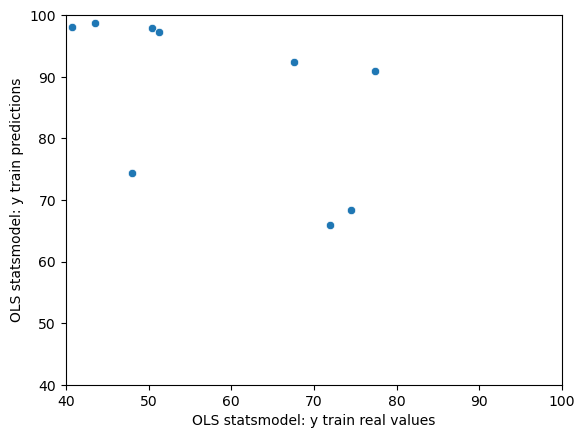

In [72]:
y_train_pred_const=model.predict(X_train_const)
fig, ax = plt.subplots()
sns.scatterplot(x=y_train, y=y_train_pred_const)
ax.set_xlabel('OLS statsmodel: y train real values')
ax.set_ylabel('OLS statsmodel: y train predictions')
ax.set_xlim(40, 100)
ax.set_ylim(40, 100)
plt.show()

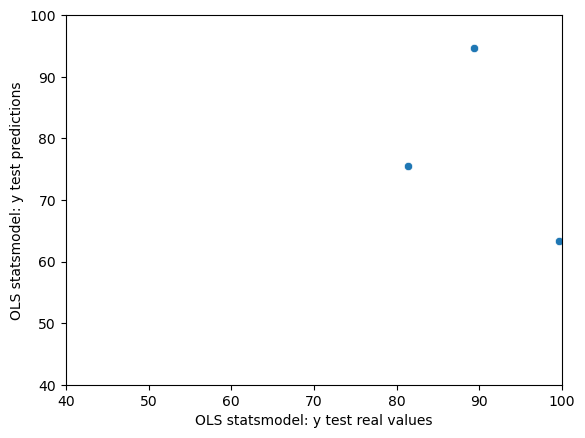

In [73]:
X_test_const=sm.add_constant(X_test)
y_test_pred=model.predict(X_test_const)
fig, ax = plt.subplots()
sns.scatterplot(x=y_test, y=y_test_pred)
ax.set_xlabel('OLS statsmodel: y test real values')
ax.set_ylabel('OLS statsmodel: y test predictions')
ax.set_xlim(40, 100)
ax.set_ylim(40, 100)
plt.show()

In [74]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
r2_new = r2_score(y_train_pred_nc, y_train) #OLS with No Constant
mse_new = mean_squared_error(y_train_pred_nc, y_train)
mae_new = mean_absolute_error(y_train_pred_nc, y_train)
rmse_new = sqrt(mse_new)

print('R2 Score:', r2_new)
print('Mean Squared Error:', mse_new)
print('Mean absolute Error:', mae_new)
print('Root Mean Squared Error:',rmse_new)

R2 Score: 0.15835551167858852
Mean Squared Error: 40681.06812378452
Mean absolute Error: 144.31136244912977
Root Mean Squared Error: 201.69548364746424


In [75]:
r2_new = r2_score(y_train_pred_const, y_train) #OLS with Constant
mse_new = mean_squared_error(y_train_pred_const, y_train)
mae_new = mean_absolute_error(y_train_pred_const, y_train)
rmse_new = sqrt(mse_new)

print('R2 Score:', r2_new)
print('Mean Squared Error:', mse_new)
print('Mean absolute Error:', mae_new)
print('Root Mean Squared Error:',rmse_new)

R2 Score: 0.09864281231546257
Mean Squared Error: 40327.17842344594
Mean absolute Error: 143.70593570399396
Root Mean Squared Error: 200.81628027489688
